In [2]:
import seaborn as sns
from ete3 import *
from utils import *
from SearchInit import *

In [3]:
gene_trees = load_gene_trees("../trees")
original_species_tree = initial_species_tree(gene_trees)

In [27]:
ITERATIONS = 18

single_random_tree = multipleInit(lambda g,n : [random_true_initial_species_tree(g,n)],
                greedySearch_NNI_SPR, gene_trees, 1, ITERATIONS)

batched_random_tree = multipleInit(random_true_initial_species_tree,
                greedySearch_NNI_SPR, gene_trees, 5, ITERATIONS)

single_random_sample = multipleInit(lambda g,n : [random_from_gene_initial_species_tree(g,n)],
                greedySearch_NNI_SPR, gene_trees, 1, ITERATIONS)

batched_random_sample = multipleInit(random_from_gene_initial_species_tree,
                greedySearch_NNI_SPR, gene_trees, 5, ITERATIONS)

min_initial_tree = multipleInit(lambda g,n : [min_initial_species_tree(g,n)],
                greedySearch_NNI_SPR, gene_trees, 1, ITERATIONS)

[Text(0, 0.5, 'Limiting symmetric duplication cost')]

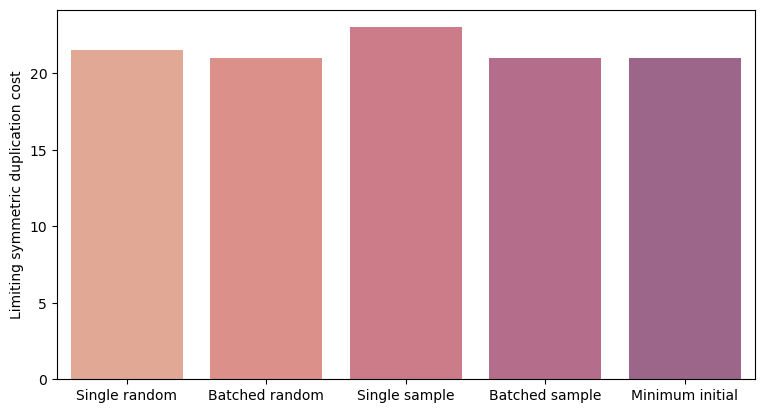

In [28]:
p_bar = sns.color_palette("flare")
data_bar = {
    "Method" : ["Single random", "Batched random", "Single sample", "Batched sample", "Minimum initial"],
    "Observation" : [single_random_tree, batched_random_tree, single_random_sample, batched_random_sample, min_initial_tree]
}
plt = sns.barplot(data_bar, x = "Method", y = "Observation", palette=p_bar, alpha=.8)
plt.figure.set_figwidth(9)
plt.set(ylabel="Limiting symmetric duplication cost")

In [13]:
print(sns.load_dataset("penguins"))

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

In [29]:
AVG_OVER_N = 10
ITERATIONS = 20

#nni_spr
data_nni_spr = [[] for _ in range(ITERATIONS)]
for n in range(AVG_OVER_N):
    [it.append(res) for it, res in zip(data_nni_spr, oneInit(random_true_initial_species_tree,
            greedySearch_NNI_SPR, gene_trees, ITERATIONS))]

#ss_spr
data_ss_spr = [[] for _ in range(ITERATIONS)]
for n in range(AVG_OVER_N):
    [it.append(res) for it, res in zip(data_ss_spr, oneInit(random_true_initial_species_tree,
            greedySearch_subSwap_SPR, gene_trees, ITERATIONS))]
#nni only
data_nni = [[] for _ in range(ITERATIONS)]
for n in range(AVG_OVER_N):
    [it.append(res) for it, res in zip(data_nni, oneInit(random_true_initial_species_tree,
            greedySearch_NNI_only, gene_trees, ITERATIONS))]

#spr only
data_spr = [[] for _ in range(ITERATIONS)]
for n in range(AVG_OVER_N):
    [it.append(res) for it, res in zip(data_spr, oneInit(random_true_initial_species_tree,
            greedySearch_SPR_only, gene_trees, ITERATIONS))]

#ss only
data_ss = [[] for _ in range(ITERATIONS)]
for n in range(AVG_OVER_N):
    [it.append(res) for it, res in zip(data_ss, oneInit(random_true_initial_species_tree,
            greedySearch_subSwap_only, gene_trees, ITERATIONS))]

In [22]:
print(data_nni_spr)
print(data_ss_spr)
def flatten(matrix: list[list]) -> list:
    return [item for row in matrix for item in row]

observations = []
methods = []
iteration = []

for meth in ("NNI/SPR alternating", "SubSwap/SPR alternating", "NNI only", "SPR only", "SubSwap only"):
    if meth == "NNI/SPR alternating":
        fl = flatten(data_nni_spr)
        print(len(fl))
        methods.extend([meth for _ in range(len(fl))])
        observations.extend(fl)
        iteration.extend([i//AVG_OVER_N for i in range(len(fl))])
    elif meth == "SubSwap/SPR alternating":
        fl = flatten(data_ss_spr)
        print(len(fl))
        methods.extend([meth for _ in range(len(fl))])
        observations.extend(fl)
        iteration.extend([i//AVG_OVER_N for i in range(len(fl))])
    elif meth == "NNI only":
        fl = flatten(data_nni)
        print(len(fl))
        methods.extend([meth for _ in range(len(fl))])
        observations.extend(fl)
        iteration.extend([i//AVG_OVER_N for i in range(len(fl))])
    elif meth == "SPR only":
        fl = flatten(data_spr)
        print(len(fl))
        methods.extend([meth for _ in range(len(fl))])
        observations.extend(fl)
        iteration.extend([i//AVG_OVER_N for i in range(len(fl))])
    else:
        fl = flatten(data_ss)
        print(len(fl))
        methods.extend([meth for _ in range(len(fl))])
        observations.extend(fl)
        iteration.extend([i//AVG_OVER_N for i in range(len(fl))])

data_rand = {
    "Method" : methods,
    "Losses" : observations, 
    "Iteration" : iteration
}

[[39.0, 41.0, 39.5, 39.5, 46.5, 39.5, 41.5, 35.5], [34.5, 35.5, 34.0, 33.5, 40.5, 35.0, 36.0, 29.5], [28.0, 33.0, 31.5, 30.5, 38.0, 28.5, 34.5, 26.5], [27.0, 31.0, 31.0, 30.5, 38.0, 26.5, 31.5, 25.0], [24.5, 28.5, 28.0, 30.5, 38.0, 25.0, 29.0, 22.5], [23.5, 27.0, 27.0, 30.5, 38.0, 23.0, 27.0, 22.5], [21.5, 26.5, 24.0, 30.5, 38.0, 22.5, 25.5, 22.5], [21.0, 25.5, 23.5, 30.5, 38.0, 21.0, 25.0, 22.5], [21.0, 24.5, 23.0, 30.5, 38.0, 21.0, 24.0, 22.5], [21.0, 24.5, 22.0, 30.5, 38.0, 21.0, 21.5, 22.5], [21.0, 24.5, 21.5, 30.5, 38.0, 21.0, 21.5, 22.5], [21.0, 24.5, 21.5, 30.5, 38.0, 21.0, 21.5, 22.5], [21.0, 24.5, 21.5, 30.5, 38.0, 21.0, 21.5, 22.5], [21.0, 24.5, 21.5, 30.5, 38.0, 21.0, 21.5, 22.5]]
[[42.5, 39.0, 43.5, 35.5, 39.0, 38.0, 40.5, 32.0], [33.0, 37.5, 41.5, 31.5, 34.5, 34.5, 38.0, 31.0], [31.0, 37.0, 39.0, 26.0, 31.0, 31.5, 36.0, 27.5], [29.0, 36.5, 39.0, 25.0, 28.5, 30.5, 35.0, 25.5], [28.5, 32.5, 39.0, 23.0, 28.0, 30.0, 32.5, 24.5], [28.0, 32.5, 39.0, 22.0, 24.0, 27.5, 25.5, 23.5]